# Task-1 :Predict the percentage of an student based on the no. of study hours. 

# GRIPJUNE21

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Import Dataset

In [8]:
url= "http://bit.ly/w-data"
s_data=pd.read_csv(url)
print("data imported")
s_data.head(10)


data imported


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [9]:
s_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [10]:
s_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Now Plot data

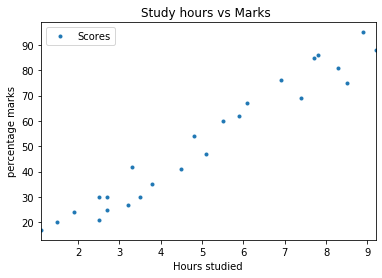

In [16]:
s_data.plot(x="Hours",y="Scores",style=".")
plt.title("Study hours vs Marks ")
plt.xlabel("Hours studied")
plt.ylabel("percentage marks")
plt.show()

In [22]:
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values

Preapairing the data for training and testing

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 2)

In [27]:
print("X_train")
print(X_train)
print()
print("X_test")
print(X_test)

X_train
[[4.5]
 [3.8]
 [3.5]
 [7.7]
 [1.5]
 [7.4]
 [5.1]
 [3.2]
 [5.5]
 [4.8]
 [2.7]
 [6.1]
 [5.9]
 [7.8]
 [3.3]
 [8.9]
 [8.3]]

X_test
[[1.1]
 [2.5]
 [1.9]
 [9.2]
 [6.9]
 [2.7]
 [8.5]
 [2.5]]


# Training the algoritham

In [33]:

from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,y_train)

print("Training complete")

Training complete


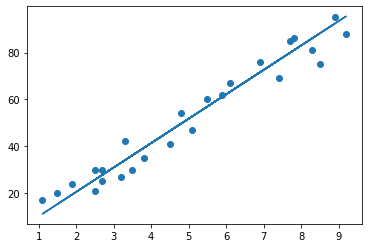

In [34]:
line = LR.coef_*X + LR.intercept_   #Line = m*x + c

plt.scatter(X,y)
plt.plot(X,line)
plt.show()

# Making Prediction

In [35]:
print(X_test)
y_pred = LR.predict(X_test)

[[1.1]
 [2.5]
 [1.9]
 [9.2]
 [6.9]
 [2.7]
 [8.5]
 [2.5]]


# Visualize actual and predected values to check accuracy

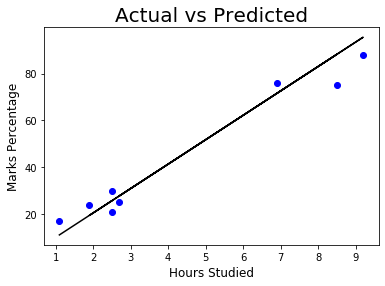

In [36]:
plt.scatter(x=X_test, y=y_test, color='blue')
plt.plot(X_test, y_pred, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

In [37]:
arr = np.array(y_test)
df = pd.DataFrame(data=arr.flatten(),columns=['Actual'])
print(df)

   Actual
0      17
1      21
2      24
3      88
4      76
5      25
6      75
7      30


In [38]:
arr1 = np.array(y_pred)
df1= pd.DataFrame(data = arr.flatten(),columns = ["Predicted"])
print(df1)

   Predicted
0         17
1         21
2         24
3         88
4         76
5         25
6         75
7         30


In [39]:
print(pd.concat([df,df1],axis = 1))

   Actual  Predicted
0      17         17
1      21         21
2      24         24
3      88         88
4      76         76
5      25         25
6      75         75
7      30         30


# Now check what will be the predicted score of a student if  studies for 9.25 hrs/ day

In [40]:
hours = 9.25
own_pred = LR.predict(np.array(hours).reshape(1,1))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 96.01612299632009


# Evaluation of the model

The final step is to evaluate the performance of algorithm. 
This step is particularly important to compare how well different algorithms perform on a particular dataset.
For simplicity here, we have chosen the mean square error. 


In [41]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 5.936576124243742


# Hence our model Completed